In [10]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scipy
!pip install statsmodels
!pip install xgboost
!pip install lightgbm
!pip install google-colab


# Importing libraries


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels
import xgboost
import lightgbm


# Load the data from local repository

In [5]:
# load the required data
PATH = './data/'
data = pd.read_excel(os.path.join(PATH,'michaelgoboola.xlsx'), sheet_name='Data')
data.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


# Load date from Google Drive

In [ ]:
# load data from  google drive
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/Colab Notebooks/'
data = pd.read_excel(os.path.join(PATH,'michaelgoboola.xlsx'), sheet_name='Data') # change path to your path
data.head()

# Data Preprocessing, Cleaning and Validation

## Check for missing values

In [11]:
# check for missing values
data.isnull().sum()

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

### Comment

## Check for repeated values

In [12]:
# check for repeated values
data.duplicated().sum()

0

### Comment

## List Numeric Columns

In [14]:
# list numeric columns
numericals = data.select_dtypes(include=['int64','float64']).columns
numericals

Index(['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

### Comment

## list Categorical Columns

In [15]:
# list categorical columns
categoricals =data.select_dtypes(include=['object']).columns
categoricals

Index([], dtype='object')

### Comment

## Check for outliers

In [ ]:
# check for outliers
data[numericals].describe()

### Comment

## Check for data types

In [17]:
# check for data types
data.dtypes

OBS#                int64
CHK_ACCT            int64
DURATION            int64
HISTORY             int64
NEW_CAR             int64
USED_CAR            int64
FURNITURE           int64
RADIO/TV            int64
EDUCATION           int64
RETRAINING          int64
AMOUNT              int64
SAV_ACCT            int64
EMPLOYMENT          int64
INSTALL_RATE        int64
MALE_DIV            int64
MALE_SINGLE         int64
MALE_MAR_or_WID     int64
CO-APPLICANT        int64
GUARANTOR           int64
PRESENT_RESIDENT    int64
REAL_ESTATE         int64
PROP_UNKN_NONE      int64
AGE                 int64
OTHER_INSTALL       int64
RENT                int64
OWN_RES             int64
NUM_CREDITS         int64
JOB                 int64
NUM_DEPENDENTS      int64
TELEPHONE           int64
FOREIGN             int64
RESPONSE            int64
dtype: object

### Comment

## Check for data distribution for numerical variables

array([[<Axes: title={'center': 'OBS#'}>,
        <Axes: title={'center': 'CHK_ACCT'}>,
        <Axes: title={'center': 'DURATION'}>,
        <Axes: title={'center': 'HISTORY'}>,
        <Axes: title={'center': 'NEW_CAR'}>,
        <Axes: title={'center': 'USED_CAR'}>],
       [<Axes: title={'center': 'FURNITURE'}>,
        <Axes: title={'center': 'RADIO/TV'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'RETRAINING'}>,
        <Axes: title={'center': 'AMOUNT'}>,
        <Axes: title={'center': 'SAV_ACCT'}>],
       [<Axes: title={'center': 'EMPLOYMENT'}>,
        <Axes: title={'center': 'INSTALL_RATE'}>,
        <Axes: title={'center': 'MALE_DIV'}>,
        <Axes: title={'center': 'MALE_SINGLE'}>,
        <Axes: title={'center': 'MALE_MAR_or_WID'}>,
        <Axes: title={'center': 'CO-APPLICANT'}>],
       [<Axes: title={'center': 'GUARANTOR'}>,
        <Axes: title={'center': 'PRESENT_RESIDENT'}>,
        <Axes: title={'center': 'REAL_ESTATE'}>,
   

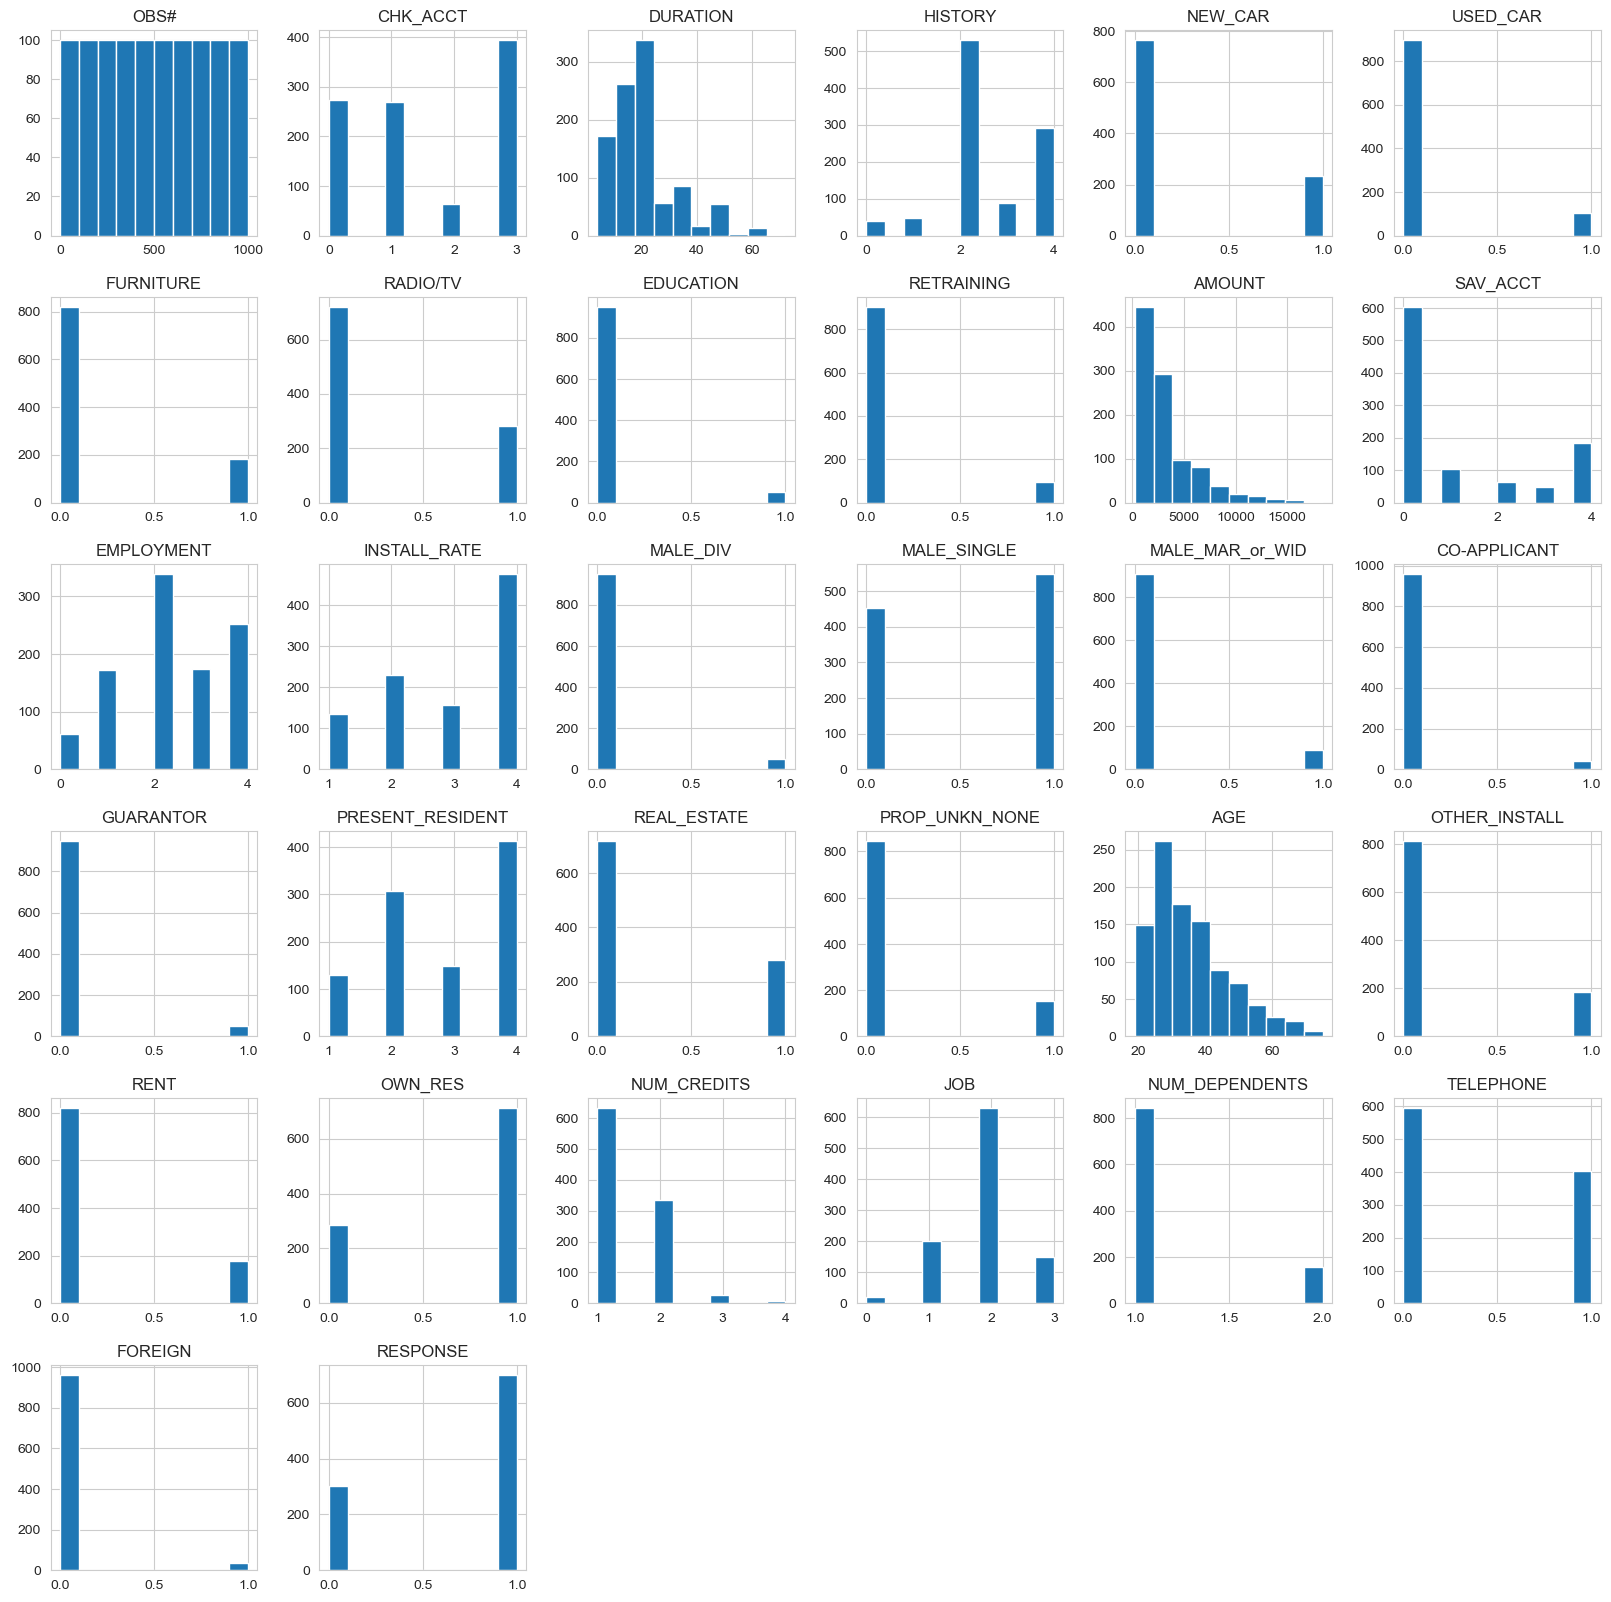

In [18]:
# check for data distribution for numerical variables
data[numericals].hist(figsize=(20,20))

### Comment

## Check for correlation between variables

In [19]:
# check for correlation between variables
data.corr()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
OBS#,1.000000,0.005852,0.030788,-0.011691,0.057692,0.008245,-0.003846,-0.017483,-0.025065,-0.018066,...,-0.010096,-0.004149,0.025442,-0.013244,0.022838,-0.027345,0.026662,-0.007829,-0.018177,-0.034606
CHK_ACCT,0.005852,1.000000,-0.072013,0.192191,-0.069559,0.064303,-0.098016,0.110632,0.007848,0.021587,...,0.059751,-0.043593,-0.091897,0.129434,0.076005,0.040663,-0.014145,0.066296,-0.026758,0.350847
DURATION,0.030788,-0.072013,1.000000,-0.077186,-0.109999,0.144939,-0.062804,-0.044319,0.003750,0.164113,...,-0.036136,0.067602,-0.064417,-0.075169,-0.011284,0.210910,-0.023834,0.164718,-0.138196,-0.214927
HISTORY,-0.011691,0.192191,-0.077186,1.000000,0.042480,0.039096,-0.025539,0.021396,0.054039,-0.090091,...,0.147086,-0.121950,-0.102540,0.100905,0.437066,0.010350,0.011550,0.052370,0.013873,0.228785
NEW_CAR,0.057692,-0.069559,-0.109999,0.042480,1.000000,-0.187291,-0.259831,-0.344672,-0.126799,-0.181149,...,0.075044,-0.027462,-0.011620,-0.009618,0.035845,-0.088711,0.102663,-0.036275,0.154436,-0.096900
USED_CAR,0.008245,0.064303,0.144939,0.039096,-0.187291,1.000000,-0.159301,-0.211317,-0.077740,-0.111062,...,0.050858,-0.009791,0.039160,-0.141375,-0.005248,0.180730,0.054862,0.136693,-0.031564,0.099791
FURNITURE,-0.003846,-0.098016,-0.062804,-0.025539,-0.259831,-0.159301,1.000000,-0.293164,-0.107850,-0.154078,...,-0.127657,-0.004446,0.105700,-0.040496,-0.070478,0.013422,-0.086515,-0.053587,-0.009590,-0.020971
RADIO/TV,-0.017483,0.110632,-0.044319,0.021396,-0.344672,-0.211317,-0.293164,1.000000,-0.143066,-0.204388,...,-0.046401,-0.034801,-0.070414,0.134705,-0.030706,-0.027683,-0.082464,-0.082243,-0.063242,0.106922
EDUCATION,-0.025065,0.007848,0.003750,0.054039,-0.126799,-0.077740,-0.107850,-0.143066,1.000000,-0.075191,...,0.068483,0.008254,0.000598,-0.097880,-0.010728,-0.001405,0.041204,0.016831,-0.044969,-0.070088
RETRAINING,-0.018066,0.021587,0.164113,-0.090091,-0.181149,-0.111062,-0.154078,-0.204388,-0.075191,1.000000,...,-0.001772,0.095155,-0.012013,0.051083,0.084980,0.001614,-0.000327,0.088221,-0.046343,-0.036129


### Comment

## Check for multicollinearity

<Axes: >

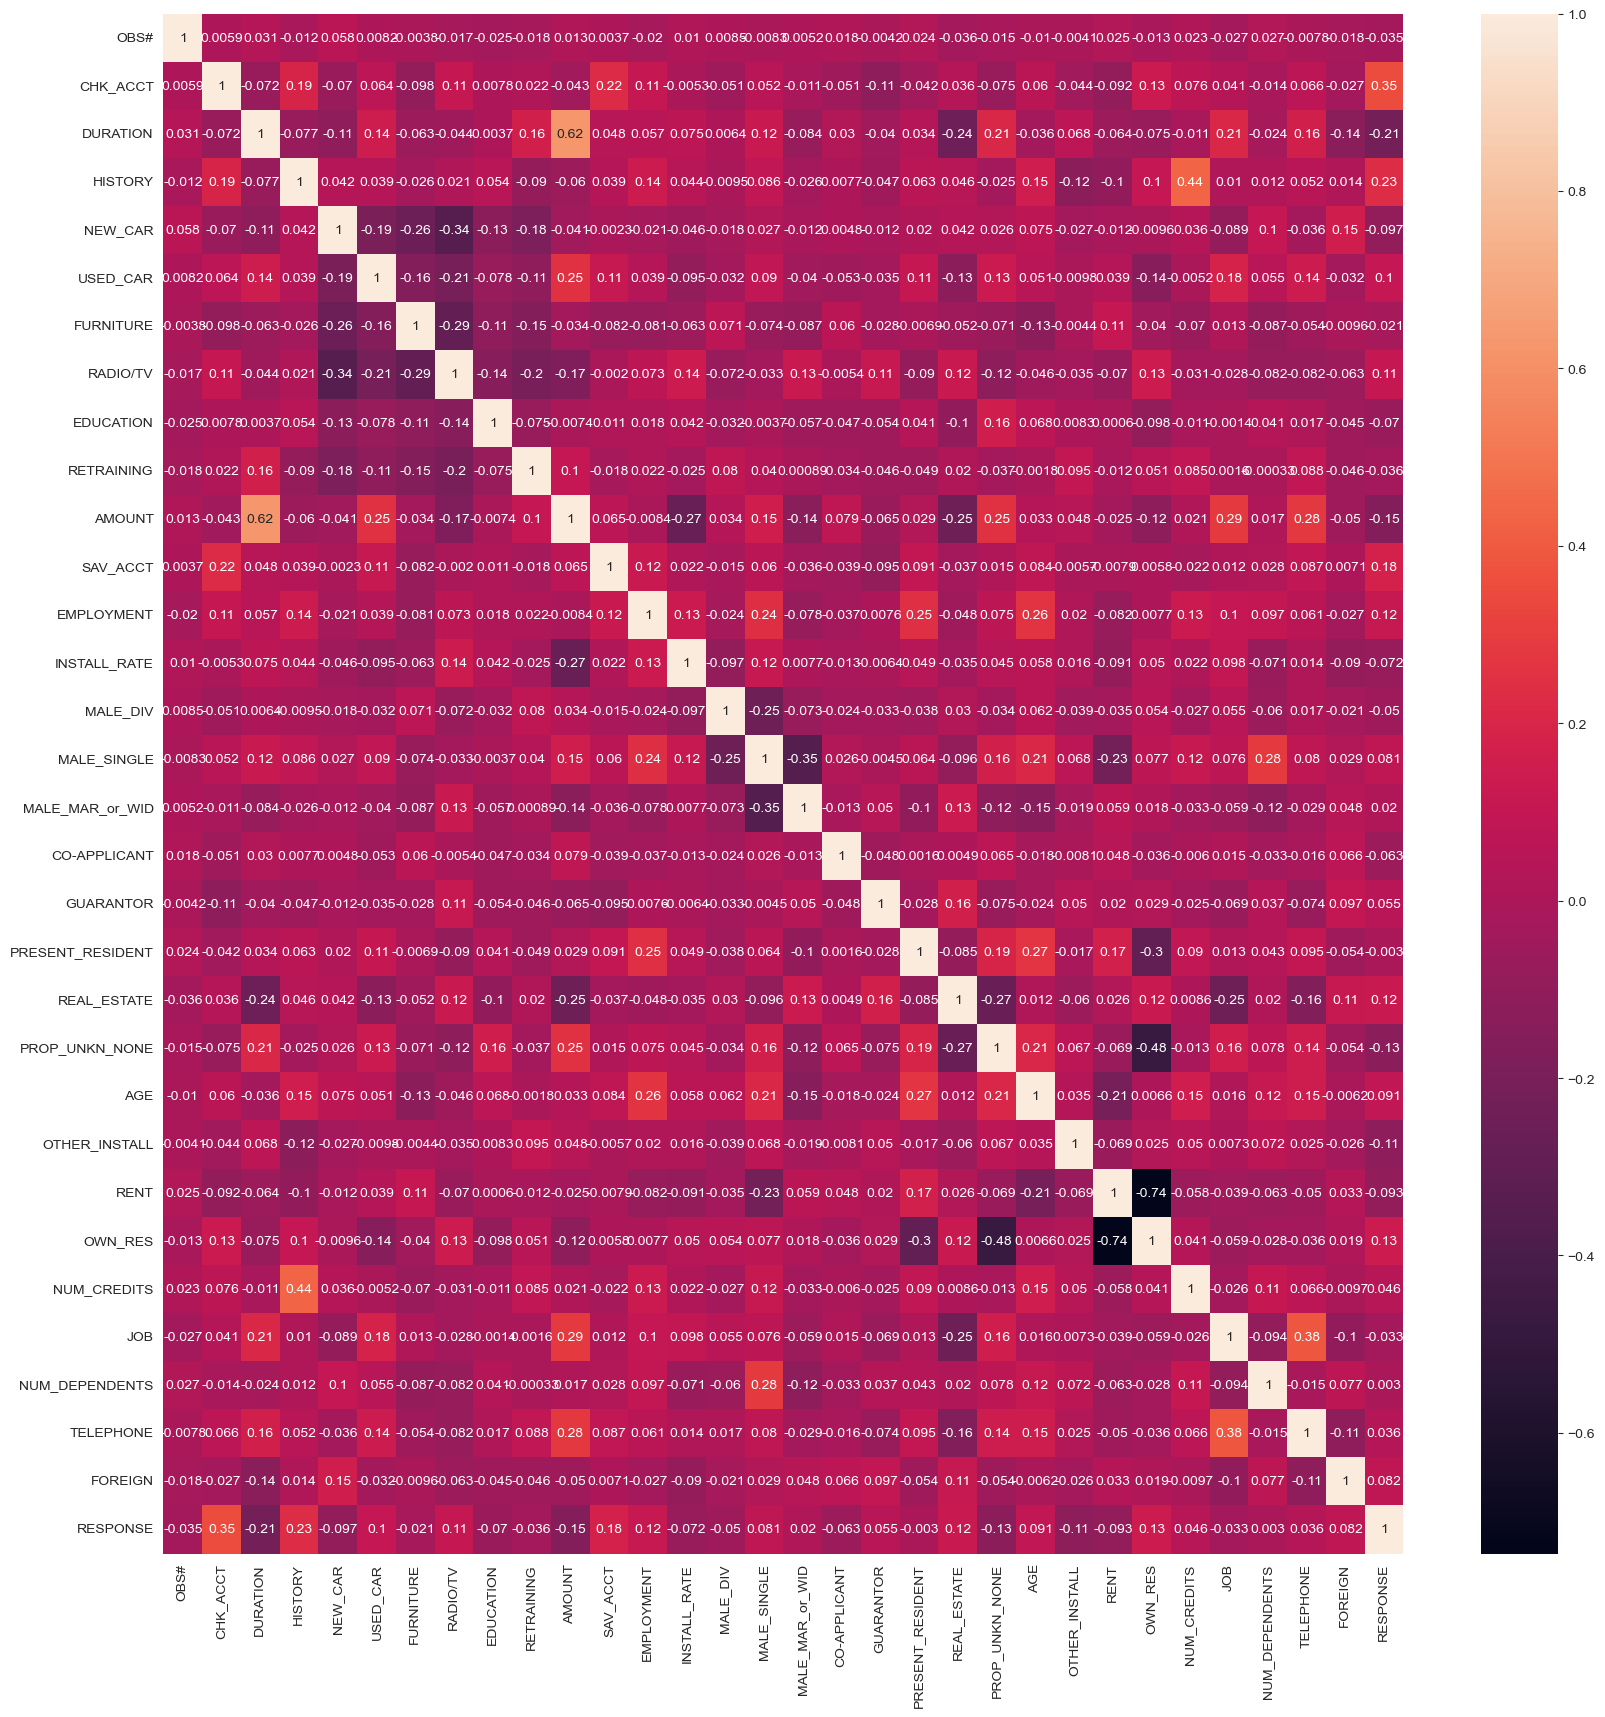

In [20]:
# check for multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

### Comment

## Check for data distribution for categorical variables

In [21]:
# check for data distribution for categorical variables
data[categoricals].describe()

ValueError: Cannot describe a DataFrame without columns

### Comment

## Check for data distribution for target variable

In [22]:
# check for data distribution for target variable
data['RESPONSE'].describe()

count    1000.000000
mean        0.700000
std         0.458487
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: RESPONSE, dtype: float64

### Comment

## Check for Counts for Categorical variables

In [23]:
# check for counts for categorical variables
for i in categoricals:
    print(data[i].value_counts())

### Comment

## Get dummy variables for categorical variables

In [25]:
# get dummy variables for categorical variables
data_with_dummies = pd.get_dummies(data, columns=categoricals, drop_first=True)
data_with_dummies.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


### Comment

# Plot and Describe the data


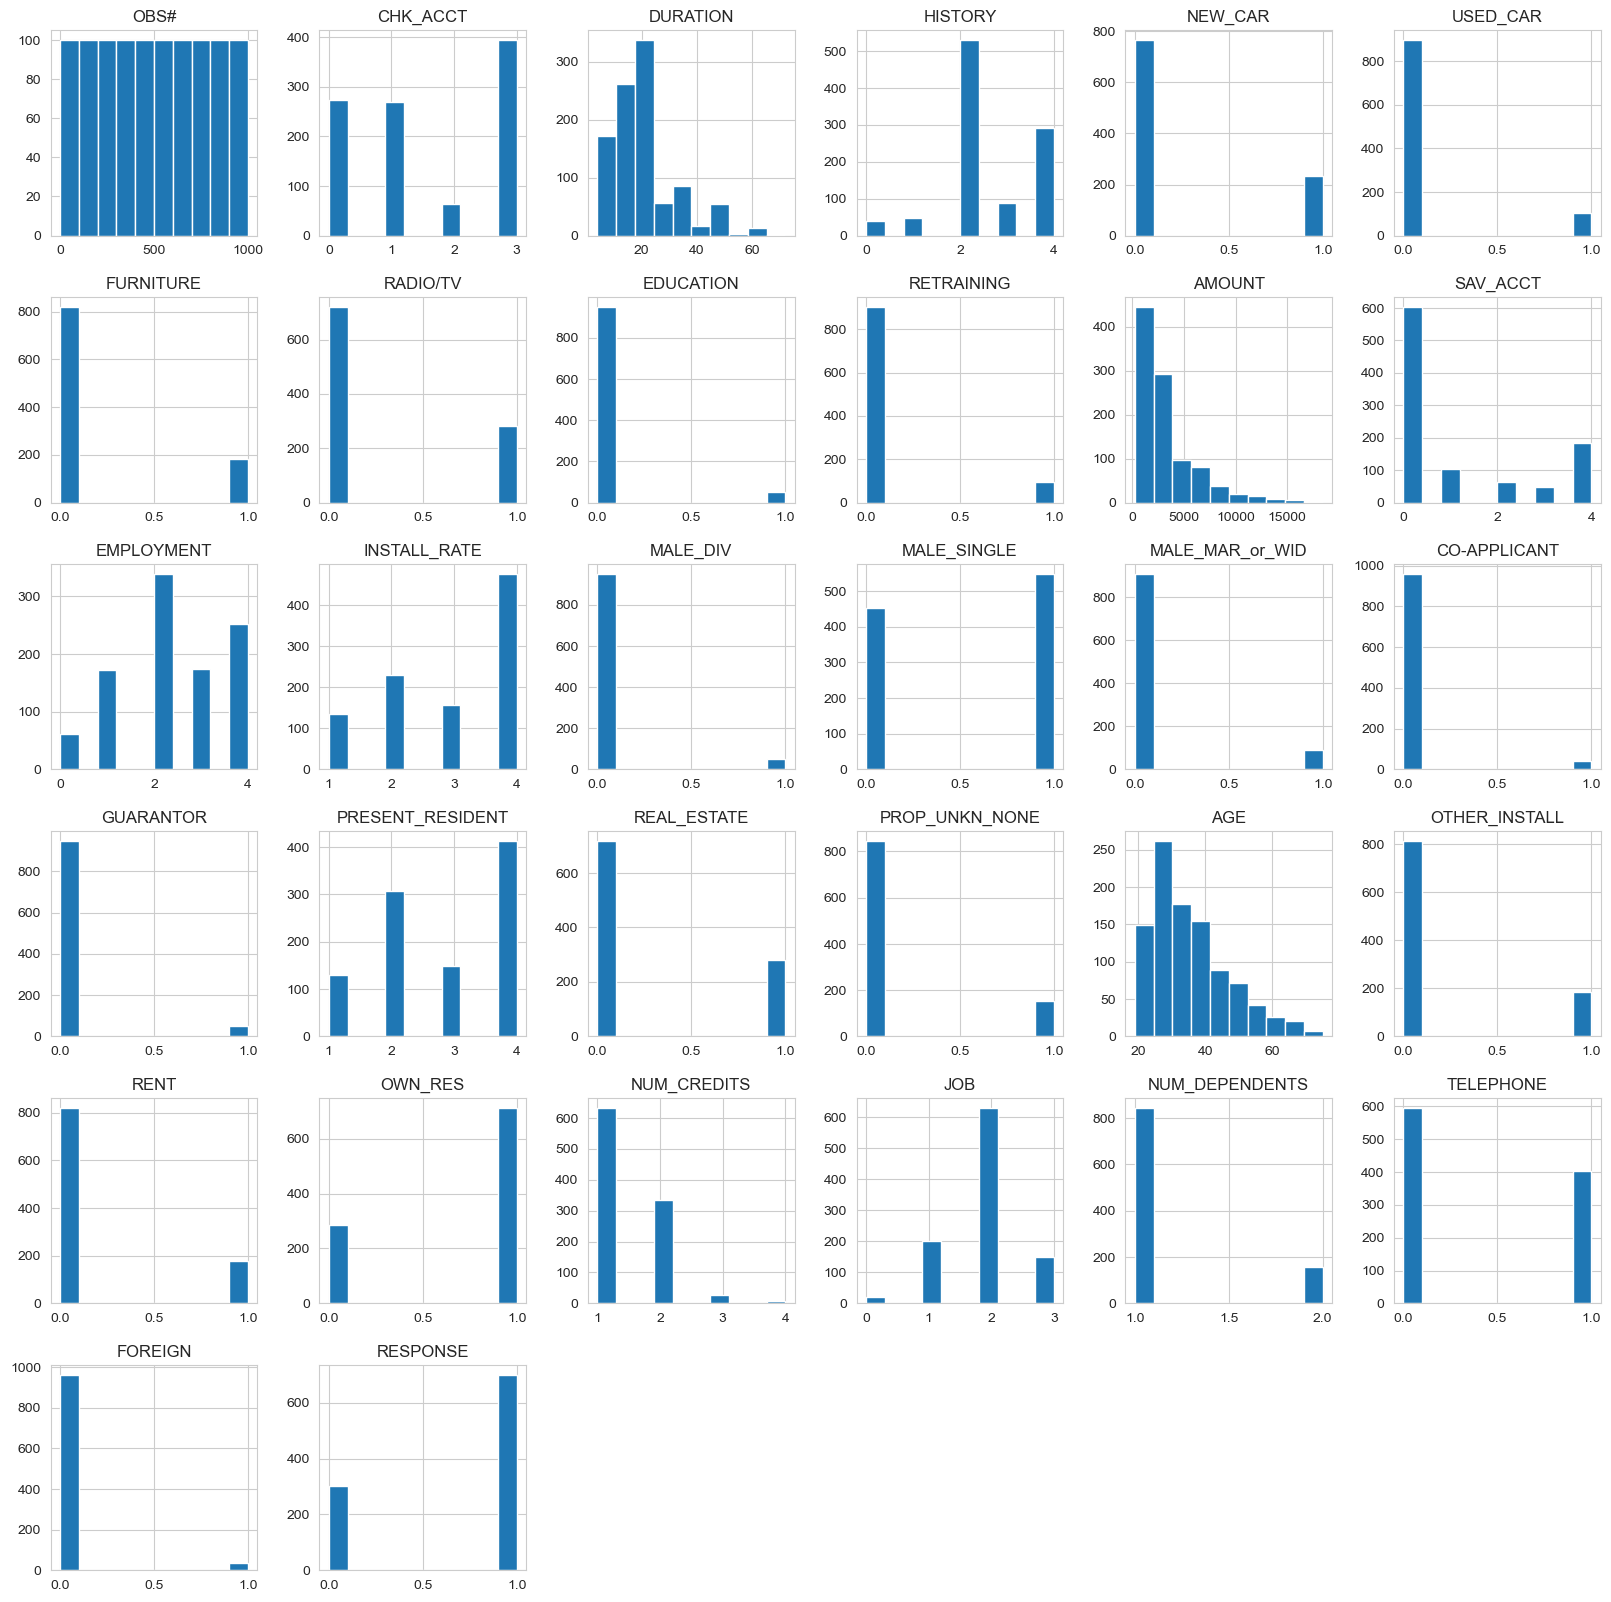

In [7]:
data.hist(figsize=(20,20))
plt.show()